# Data exploration

- load data
- inspect the graph
- clustering?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

We are using the `ogbl-collab` dataset from [OGB](https://ogb.stanford.edu/docs/linkprop/#ogbl-collab), this comes with a dataloader and predefined train/val/test split. That's convenient!

In [2]:
from ogb.linkproppred import LinkPropPredDataset

In [93]:
d_name = "ogbl-collab"

dataset = LinkPropPredDataset(name = d_name)

split_edge = dataset.get_edge_split()
train_edge, valid_edge, test_edge = split_edge["train"], split_edge["valid"], split_edge["test"]
graph_data = dataset[0] # graph: library-agnostic graph object

In [94]:
dataset

LinkPropPredDataset(1)

In [95]:
graph_data.keys()

dict_keys(['edge_index', 'edge_feat', 'edge_weight', 'edge_year', 'node_feat', 'num_nodes'])

In [96]:
graph_data['edge_index'].shape

(2, 2358104)

In [97]:
graph_data['edge_weight'].shape

(2358104, 1)

In [98]:
graph_data['edge_year'].shape

(2358104, 1)

In [110]:
graph_data['node_feat'][140614,:]

array([-1.32918e-01, -5.87600e-03, -2.05939e-01, -2.11210e-02,
        3.12630e-02, -9.01090e-02, -3.22750e-01, -1.57162e-01,
        1.03932e-01,  5.79400e-02,  4.49910e-02, -4.58188e-01,
        1.73744e-01, -2.29000e-02, -1.95900e-01,  1.01380e-02,
       -5.71400e-02,  5.35970e-01,  5.04650e-02, -9.66840e-02,
       -2.65003e-01,  2.18966e-01, -3.35068e-01,  1.48871e-01,
       -5.09190e-02,  3.95050e-01,  8.57860e-02, -2.38978e-01,
       -6.62760e-02,  1.05788e-01, -2.05765e-01, -7.62500e-03,
       -7.20700e-03,  1.10962e-01,  1.26922e-01, -1.40982e-01,
       -1.09841e-01,  2.63480e-02,  4.29530e-02,  1.28115e-01,
        2.12630e-01, -3.75220e-02,  1.01497e-01,  6.36510e-02,
        1.23467e-01,  5.17030e-02,  1.69360e-02,  4.14000e-04,
        3.77085e-01,  8.66490e-02,  1.20353e-01,  4.73640e-02,
       -4.46760e-02,  9.72700e-03, -5.18360e-02,  7.58620e-02,
       -4.60710e-02, -9.65860e-02,  3.01470e-02,  5.58720e-02,
        3.56654e-01, -3.09390e-02,  1.72652e-01, -1.255

In [108]:
graph_data['num_nodes']

235868

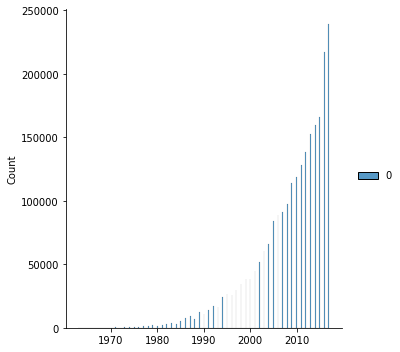

In [100]:
sns.displot(graph_data['edge_year'])

In [101]:
train_edge

{'edge': array([[150989, 224881],
        [150989, 224881],
        [180078, 199043],
        ...,
        [ 60425, 221741],
        [135758, 221741],
        [140614, 207232]]),
 'weight': array([2, 1, 1, ..., 1, 1, 1]),
 'year': array([2004, 2002, 2015, ..., 2006, 2006, 1984])}

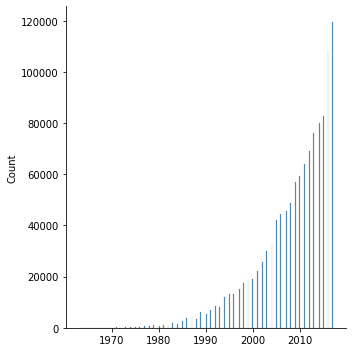

In [102]:
sns.displot(train_edge['year'])

<AxesSubplot:ylabel='count'>

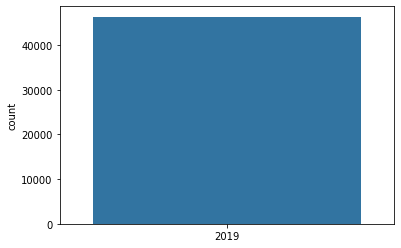

In [129]:
sns.countplot(data=test_edge, x='year')

# Networkx graph

In [58]:
edge_list = train_edge['edge']
years_list = train_edge['year']
weights_list = train_edge['weight']

In [65]:
edge_list.shape

(1179052, 2)

In [66]:
attributes = np.concatenate(([weights_list],[years_list]), axis=0)

In [109]:
edge_list[-1]

array([140614, 207232])

In [74]:
edges_w_attributes[0, :]

array([150989, 224881,      2,   2004])

In [73]:

edges_w_attributes = np.concatenate((edge_list, attributes.T), axis=1)

In [60]:
import networkx as nx

In [75]:
graph = nx.MultiGraph()

for item in edges_w_attributes:
    graph.add_edge(item[0], item[1], weight=item[2], year=item[3])

## Explore graph statistics

In [131]:
# python louvain
import community as community_louvain


In [132]:
partition = community_louvain.best_partition(graph)

In [136]:
partition

{150989: 0,
 224881: 1,
 180078: 2,
 199043: 2,
 49077: 2,
 72822: 2,
 22617: 3,
 162495: 3,
 34959: 4,
 115736: 4,
 168022: 3,
 128982: 3,
 114088: 3,
 167272: 5,
 32002: 5,
 190331: 6,
 327: 6,
 63242: 7,
 51566: 7,
 102316: 8,
 162324: 8,
 9321: 9,
 149113: 9,
 215956: 9,
 183651: 3,
 113128: 3,
 233896: 8,
 107367: 10,
 149692: 10,
 141411: 10,
 117112: 6,
 134334: 6,
 84762: 11,
 115412: 11,
 149851: 12,
 16546: 12,
 188591: 13,
 60984: 7,
 46385: 13,
 111150: 13,
 89366: 14,
 114490: 14,
 162625: 15,
 218414: 15,
 174266: 15,
 227350: 16,
 83730: 16,
 147834: 11,
 220958: 11,
 72847: 0,
 127483: 17,
 186854: 17,
 179260: 17,
 59168: 17,
 219913: 11,
 147915: 18,
 103926: 18,
 148278: 18,
 137714: 19,
 173074: 20,
 110597: 20,
 31670: 20,
 127610: 4,
 40466: 4,
 56194: 13,
 126397: 13,
 100860: 21,
 136989: 21,
 30383: 9,
 196149: 22,
 137914: 22,
 587: 23,
 126460: 23,
 223158: 23,
 157973: 23,
 16035: 4,
 130545: 4,
 121361: 24,
 35138: 24,
 80766: 24,
 179123: 2,
 72852: 2,
 18